In [9]:
import os

circle_dir = os.path.join('./data/circle_final/real_circle_output/train/real_circle')
square_dir = os.path.join('./data/square_final/square_output/train/square')
cylinder_dir = os.path.join('./data/cylinder_final/cylinder_output/train/cylinder')

circle_files = os.listdir(circle_dir)
square_files = os.listdir(square_dir)
cylinder_files = os.listdir(cylinder_dir)

print('Total number of training circle images:', len(circle_files))
print('Total number of training square images:', len(square_files))
print('Total number of training cylinder images:', len(cylinder_files))

print(circle_files[:10])
print(square_files[:10])
print(cylinder_files[:10])

Total number of training circle images: 203
Total number of training square images: 224
Total number of training cylinder images: 175
['circle1.jpg', 'circle100.jpg', 'circle102.jpg', 'circle103.jpg', 'circle104.jpg', 'circle105.jpg', 'circle107.jpg', 'circle109.jpg', 'circle11.jpg', 'circle112.jpg']
['square10.jpg', 'square100.jpg', 'square101.jpg', 'square102.jpg', 'square103.jpg', 'square104.jpg', 'square106.jpg', 'square107.jpg', 'square108.jpg', 'square109.jpg']
['cylinder10.jpg', 'cylinder100.jpg', 'cylinder101.jpg', 'cylinder102.jpg', 'cylinder103.jpg', 'cylinder104.jpg', 'cylinder106.jpg', 'cylinder107.jpg', 'cylinder108.jpg', 'cylinder109.jpg']


./data/circle_final/real_circle_output/train/real_circle\circle1.jpg


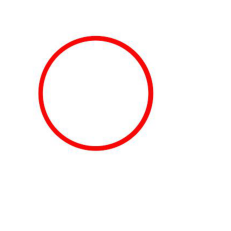

./data/circle_final/real_circle_output/train/real_circle\circle100.jpg


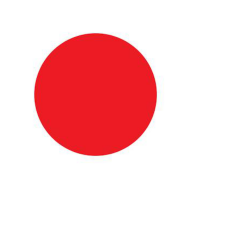

./data/square_final/square_output/train/square\square10.jpg


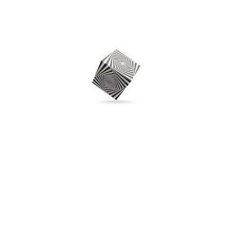

./data/square_final/square_output/train/square\square100.jpg


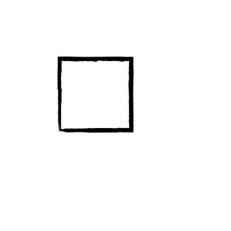

./data/cylinder_final/cylinder_output/train/cylinder\cylinder10.jpg


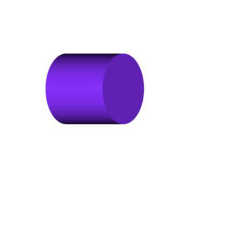

./data/cylinder_final/cylinder_output/train/cylinder\cylinder100.jpg


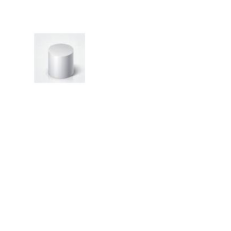

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_circle = [os.path.join(circle_dir, fname) for fname in circle_files[pic_index-2:pic_index]]
next_square = [os.path.join(square_dir, fname) for fname in square_files[pic_index-2:pic_index]]
next_cylinder = [os.path.join(cylinder_dir, fname) for fname in cylinder_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_circle + next_square + next_cylinder):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [16]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./data/finaldata/train"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "./data/finaldata/val/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=16
)

validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=16
)

model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 602 images belonging to 3 classes.
Found 184 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
______________________________________

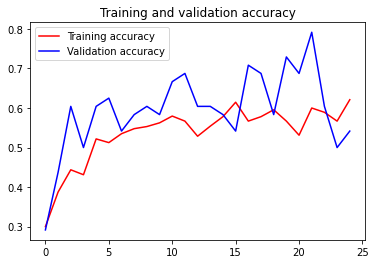

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

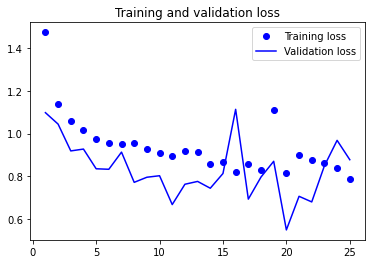

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()